### What is Explainable AI (XAI)?

Explainable AI (XAI) refers to artificial intelligence systems designed to make their decisions and predictions understandable to humans. The goal is to create models whose inner workings can be interpreted, ensuring transparency, trust, and accountability in AI systems.

### XAI Techniques or Methods

1. **LIME (Local Interpretable Model-agnostic Explanations)**: Explains individual predictions by approximating complex models with simple, interpretable models locally around the prediction.
2. **SHAP (Shapley Additive Explanations)**: Provides feature importance by calculating the contribution of each feature to the model’s prediction based on cooperative game theory.
3. **Permutation Importance**: Measures feature importance by permuting feature values and observing changes in model performance.
4. **Partial Dependence Plots (PDPs)**: Visualizes the relationship between a feature and the model’s prediction, isolating the impact of individual features.
5. **Feature Importance**: Identifies which features most influence the predictions of a model, often used in tree-based models.

### Why XAI Matters?

- **Transparency**: Helps users understand how decisions are made.
- **Trust**: Improves confidence in AI systems, especially in sensitive areas like healthcare and finance.
- **Fairness**: Detects and mitigates biases in decision-making processes.


# 1. Permutation Importance
is a technique in Explainable AI (XAI) used to measure the importance of individual features in a predictive model. It assesses how much a model's performance metric (e.g., accuracy, F1-score, RMSE) changes when the values of a feature are randomly permuted.

### How It Works

1. **Baseline Performance**: The model's performance is first evaluated on the dataset using all the original feature values.
2. **Permute One Feature**: One feature at a time is randomly shuffled (permuted), breaking the relationship between that feature and the target variable.
3. **Re-Evaluate Performance**: The model's performance is recalculated using the permuted dataset.
4. **Importance Calculation**: The difference in performance before and after permutation reflects the importance of the feature. Larger performance drops indicate more important features.

### Key Concepts

- **Feature Independence**: Permuting disrupts the natural distribution of the feature, isolating its impact on the model's predictions.
- **Interpretability**: Provides intuitive, quantitative insights into feature relevance.
- **Model-Agnostic**: Can be applied to any machine learning model since it works post-training.

### Advantages

- Simple to implement and understand.
- Works with any machine learning model.
- Reflects the feature's impact on the specific metric being used (e.g., accuracy, RMSE).

### Limitations

- **Correlation Issue**: If features are highly correlated, permuting one feature affects the information carried by others, leading to underestimated importance.
- **Computational Cost**: Requires re-evaluating the model multiple times, which can be time-consuming for large datasets or complex models.


In [ ]:
import pandas as pd
data = pd.read_csv("Admission_Predict.csv").drop('Serial No.', axis=1)
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train_reg, y_test_reg = train_test_split(data.drop(["Chance of Admit "], axis=1),
                                                    data['Chance of Admit '],
                                                    test_size=0.25,
                                                    random_state=20)

def reg_to_clf(col):
  new = [ 1 if val>0.6 else 0 for val in col ]
  return new

y_train_clf, y_test_clf = reg_to_clf(y_train_reg), reg_to_clf(y_test_reg)

In [ ]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
328,324,112,4,4.0,3.5,8.77,1
283,321,111,3,2.5,3.0,8.90,1
53,324,112,4,4.0,2.5,8.10,1
148,339,116,4,4.0,3.5,9.80,1
16,317,107,3,4.0,3.0,8.70,0


In [ ]:
y_train_reg[:10], y_train_clf[:10]

(328    0.80
 283    0.80
 53     0.72
 148    0.96
 16     0.66
 83     0.92
 324    0.67
 29     0.54
 62     0.54
 49     0.78
 Name: Chance of Admit , dtype: float64,
 [1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
model_clf = MLPClassifier(hidden_layer_sizes=(10,10))
model_clf.fit(X_train, y_train_clf)

model_reg = MLPRegressor(hidden_layer_sizes=(10,10))
model_reg.fit(X_train, y_train_reg)

MLPRegressor(hidden_layer_sizes=(10, 10))

In [ ]:
from sklearn.inspection import permutation_importance
results_clf = permutation_importance(model_clf,
                                 X_train,
                                 y_train_clf,
                                 n_repeats=10,
                                 random_state=40,
                                 scoring='accuracy')

print(results_clf.importances_mean)

[-0.01533333  0.09266667 -0.004      -0.001      -0.006      -0.00266667
  0.00066667]


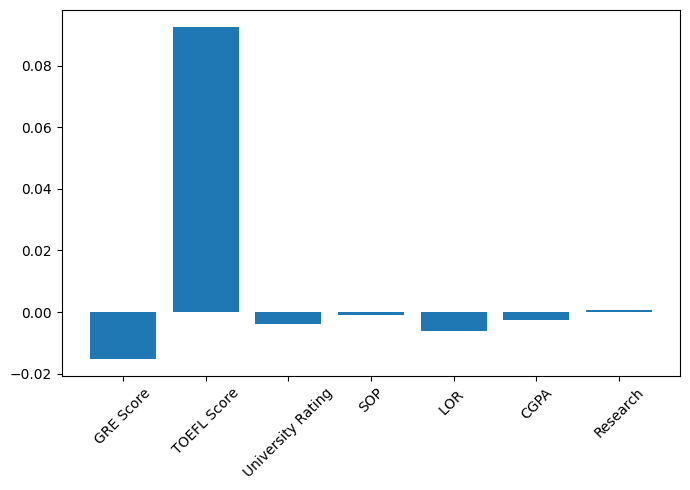

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.bar(X_train.columns, results_clf.importances_mean)
plt.xticks(rotation=45)
plt.tight_layout()

# 2. SHAP in Explainable AI (XAI)

SHAP (SHapley Additive exPlanations) is a powerful framework in Explainable AI (XAI) that provides insights into the predictions of machine learning models by attributing the contribution of each feature to a specific prediction. It is based on **Shapley values**, a concept from cooperative game theory, which ensures a fair distribution of contributions among features.

## Key Concepts of SHAP

1. **Shapley Values**:
   - Derived from game theory, Shapley values measure how much each "player" (feature) contributes to the "game" (model prediction).
   - In the context of SHAP, a feature's Shapley value represents its contribution to moving the model's prediction from the baseline (average prediction) to the actual prediction.

2. **Additive Feature Attribution**:
   - SHAP uses an additive model where the output is the sum of contributions from all features, ensuring interpretability.
   - Mathematically:
     \[
     f(x) = \phi_0 + \sum_{i=1}^n \phi_i
     \]
     Where:
     - \(f(x)\): Model prediction for an input \(x\).
     - \(\phi_0\): Baseline value (average prediction when no features are considered).
     - \(\phi_i\): Contribution of feature \(i\).

3. **Baseline Value**:
   - This is the model's expected output if no input features are provided.
   - It represents the average prediction across the dataset.

4. **Feature Contributions**:
   - SHAP calculates how much each feature contributes to the difference between the baseline value and the model's prediction for a given input.

---

## Why Use SHAP?

1. **Model-Agnostic**:
   - SHAP can explain any machine learning model, including tree-based models, neural networks, and linear models.

2. **Consistent and Fair**:
   - The Shapley value properties ensure that feature contributions are calculated consistently across all predictions, making the explanations reliable and fair.

3. **Global and Local Interpretability**:
   - **Local Interpretability**: Explains individual predictions by showing each feature's contribution.
   - **Global Interpretability**: Aggregates feature contributions across many instances to provide insights into overall feature importance.

---

## How SHAP Works

1. **Perturbation of Features**:
   - SHAP systematically perturbs feature values and observes the impact on the model's output to calculate contributions.

2. **Coalition of Features**:
   - SHAP considers all possible subsets (coalitions) of features to compute the marginal contribution of a feature when added to the coalition.

3. **Efficient Algorithms**:
   - Computing exact Shapley values can be computationally expensive. SHAP uses optimized methods, such as TreeSHAP for tree-based models, to compute values efficiently.

---

## Visualizations in SHAP

SHAP provides various visualizations to interpret model predictions:

1. **Force Plot**:
   - Visualizes the contributions of features for a single prediction, showing how each feature pushes the prediction above or below the baseline.

2. **Summary Plot**:
   - Combines feature importance and effects into a single plot. Each point represents a feature value for a specific instance, with color indicating the feature's value.

3. **Dependence Plot**:
   - Shows how a feature's value affects its SHAP value, highlighting interactions with other features.

4. **Feature Importance Plot**:
   - Aggregates the absolute SHAP values across instances to show global feature importance.

---

## Applications of SHAP

1. **Debugging Models**:
   - Identifies features driving incorrect or unexpected predictions.

2. **Compliance**:
   - Provides transparency for AI models in regulated industries like finance, healthcare, and insurance.

3. **Improving Trust**:
   - Helps stakeholders, such as non-technical decision-makers, understand and trust AI models.

4. **Model Optimization**:
   - Identifies irrelevant or redundant features, improving model performance.

---


In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

#REGRESSION
model_reg = RandomForestRegressor()
model_reg.fit(X_train, y_train_reg)

#CLASSIFICATION
model_clf = RandomForestClassifier()
model_clf.fit(X_train, y_train_clf)

RandomForestClassifier()

In [ ]:
import shap

explainer_reg = shap.TreeExplainer(model_reg)
shap_values_reg = explainer_reg.shap_values(X_train)


explainer_clf = shap.TreeExplainer(model_clf)
shap_values_clf = explainer_clf.shap_values(X_train)

In [ ]:
print("Regression Shap Vaues Shape",shap_values_reg.shape)

pd.DataFrame(shap_values_reg)

Regression Shap Vaues Shape (300, 7)


,0,1,2,3,4,5,6
0,0.019896,0.002320,0.004458,-0.000477,0.003101,0.016428,0.005463
1,0.015598,0.003788,-0.001273,-0.001111,-0.001284,0.031936,0.009835
2,0.049595,0.001517,0.010389,0.002336,-0.006000,-0.089305,0.006657
3,0.019179,-0.001722,0.002868,0.000720,0.000996,0.205004,0.002545
4,-0.001014,0.001332,0.000670,-0.001272,-0.003711,-0.029417,-0.015999
...,...,...,...,...,...,...,...
295,0.004495,0.002059,-0.007991,0.002295,-0.001194,0.021222,-0.005398
296,0.017428,0.003428,0.003617,-0.000244,0.001159,0.065140,0.006959
297,-0.009767,0.004585,-0.009257,-0.000765,0.009204,-0.027779,-0.003733
298,-0.021717,-0.014367,-0.007364,-0.008791,-0.009332,-0.135096,-0.002245


In [ ]:
print("Here there is another dimention, which reporesents the class",shap_values_clf.shape)
pd.DataFrame(shap_values_clf[:,:,1])

Here there is another dimention, which reporesents the class (300, 7, 2)


,0,1,2,3,4,5,6
0,0.053499,0.009218,0.010516,0.026151,-0.001357,0.053735,0.024937
1,0.060291,0.009722,0.024746,0.010289,0.001925,0.064687,0.015041
2,0.075568,0.037843,0.024836,0.032370,-0.019166,-0.017729,0.012979
3,0.045700,0.018745,0.007625,0.026702,-0.001409,0.057874,0.021461
4,0.049537,0.020117,0.033225,0.027585,0.005397,0.039902,-0.009064
...,...,...,...,...,...,...,...
295,0.057607,-0.010363,-0.022395,0.031822,0.017777,0.089726,0.002526
296,0.056330,0.021123,0.009478,0.018355,0.002701,0.057714,0.020999
297,-0.017509,0.033905,-0.013892,0.024671,0.037413,0.079020,0.003092
298,-0.141749,-0.083794,-0.029075,-0.197964,-0.076066,-0.268904,-0.005749


In [ ]:
# Feature importance
import numpy as np
mean_shap_val_clf = np.abs(shap_values_clf[:,:,1]).mean(axis=0)
mean_shap_val_reg = np.abs(shap_values_reg).mean(axis=0)

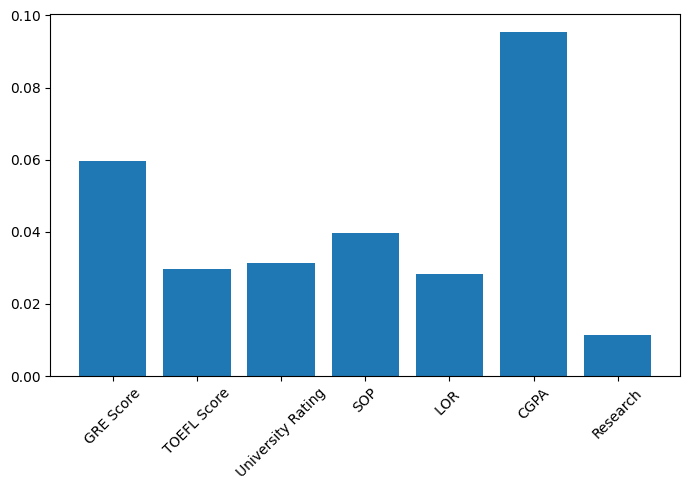

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(X_train.columns, mean_shap_val_clf)
plt.xticks(rotation=45)
plt.tight_layout()

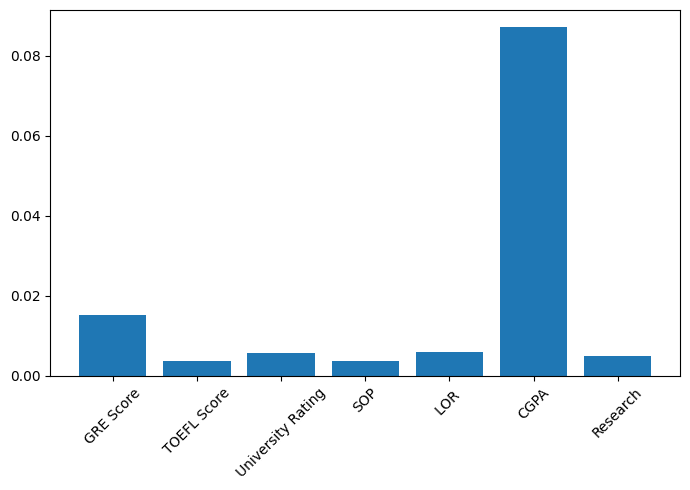

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(X_train.columns, mean_shap_val_reg)
plt.xticks(rotation=45)
plt.tight_layout()

### Shap Kernel Explainers

In [ ]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
model_clf = MLPClassifier(hidden_layer_sizes=(10,10))
model_clf.fit(X_train, y_train_clf)

model_reg = MLPRegressor(hidden_layer_sizes=(10,10))
model_reg.fit(X_train, y_train_reg)

MLPRegressor(hidden_layer_sizes=(10, 10))

In [ ]:
explainer_clf = shap.KernelExplainer( model_clf.predict_proba,
                                 shap.kmeans(X_train, 10)
                                 )

shap_values_clf = explainer_clf.shap_values(X_train)


explainer_reg = shap.KernelExplainer( model_reg.predict,
                                 shap.kmeans(X_train, 10)
                                 )

shap_values_reg = explainer_reg.shap_values(X_train)

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

In [ ]:
shap_values_clf

array([[[-3.51979375e-03,  3.51979375e-03],
        [ 3.32214344e-03, -3.32214344e-03],
        [-1.92937554e-03,  1.92937554e-03],
        ...,
        [-3.09944772e-05,  3.09944772e-05],
        [ 2.95740688e-04, -2.95740688e-04],
        [ 4.98651006e-04, -4.98651006e-04]],

       [[-2.61796050e-03,  2.61796050e-03],
        [ 3.03954683e-03, -3.03954683e-03],
        [ 4.07936961e-04, -4.07936961e-04],
        ...,
        [ 6.82267087e-04, -6.82267087e-04],
        [ 5.56681522e-04, -5.56681522e-04],
        [ 5.84117760e-04, -5.84117760e-04]],

       [[-3.54420540e-03,  3.54420540e-03],
        [ 3.34166785e-03, -3.34166785e-03],
        [-1.94280547e-03,  1.94280547e-03],
        ...,
        [ 1.16837179e-03, -1.16837179e-03],
        [-6.69412600e-04,  6.69412600e-04],
        [ 5.02072195e-04, -5.02072195e-04]],

       ...,

       [[ 4.65026590e-03, -4.65026590e-03],
        [ 1.47636076e-03, -1.47636076e-03],
        [ 3.49227774e-03, -3.49227774e-03],
        ...,
     

In [ ]:
# Feature importance
import numpy as np
mean_shap_val_clf = np.abs(shap_values_clf[:,:,1]).mean(axis=0)
mean_shap_val_reg = np.abs(shap_values_reg).mean(axis=0)

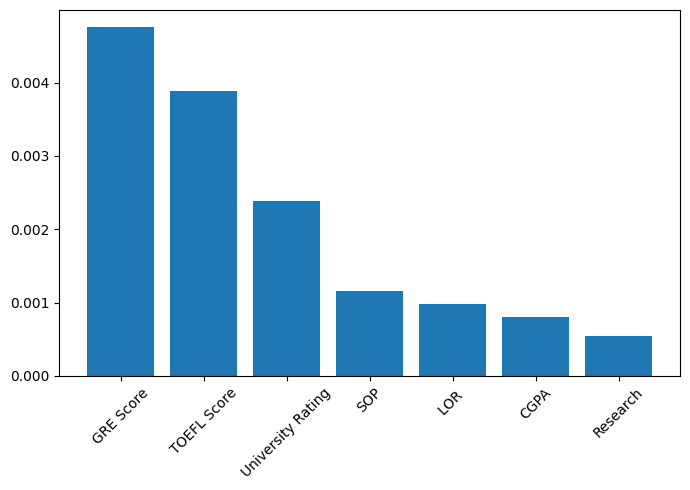

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(X_train.columns, mean_shap_val_clf)
plt.xticks(rotation=45)
plt.tight_layout()

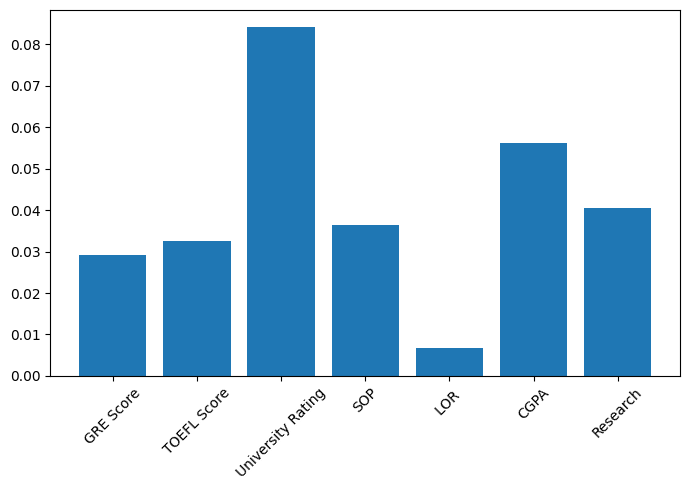

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(X_train.columns, mean_shap_val_reg)
plt.xticks(rotation=45)
plt.tight_layout()

### Using Shap Vizualization

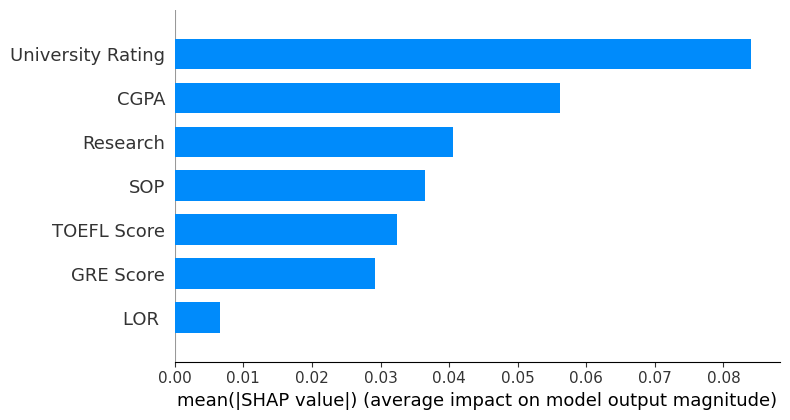

In [ ]:
shap.summary_plot(shap_values_reg, X_train, plot_type='bar')

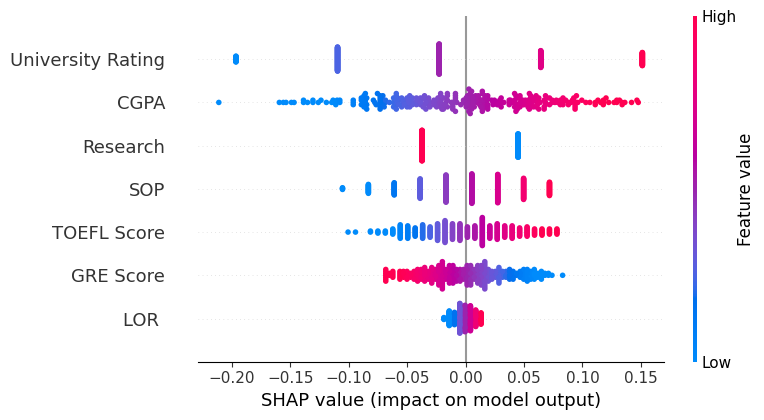

In [ ]:
shap.summary_plot(shap_values_reg, X_train, plot_type='dot')

##### Here dependent feature is chance of admission
##### so here pink values means increase in y
##### and blue dot means decrease in y

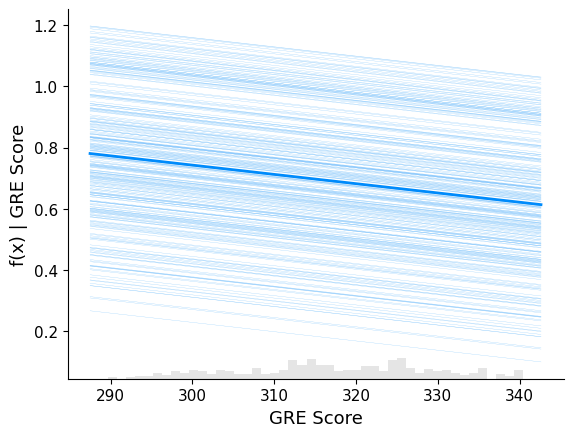

In [ ]:
shap.partial_dependence_plot("GRE Score", model_reg.predict, X_train)

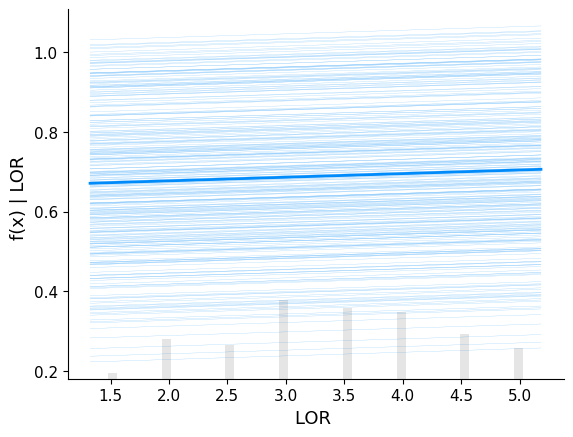

In [ ]:
shap.partial_dependence_plot("LOR ", model_reg.predict, X_train)

### Global Explainability - Explainibility of entire model

### Local Explainability - Explainability on a single instance


### Waterfall plot on a feature

Shap Values Shape: (7,)


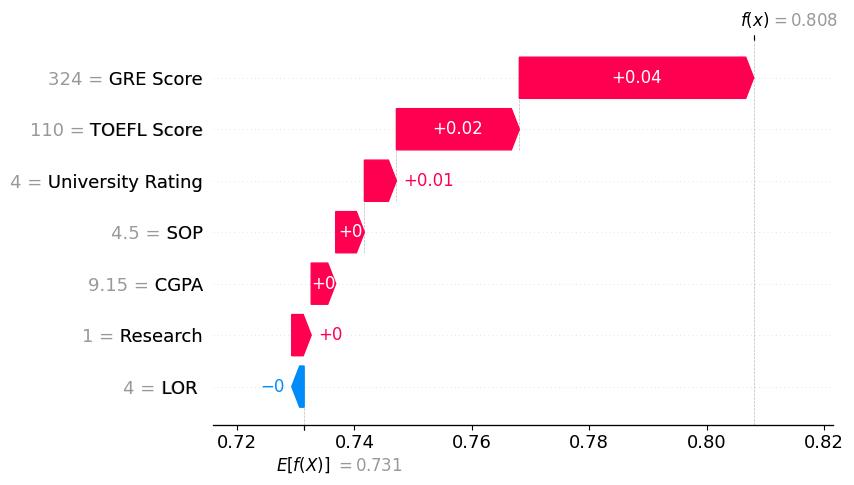

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor()
model_knn.fit(X_train, y_train_reg)

explainer = shap.KernelExplainer(model_knn.predict, shap.kmeans(X_train, 10))
test_instance = x_test.iloc[1, :]
shap_values = explainer.shap_values(test_instance)
print(f"Shap Values Shape: {shap_values.shape}")

shap.waterfall_plot(
    shap.Explanation(
        values = shap_values,
        base_values = explainer.expected_value,
        data = x_test.iloc[1, :],
        feature_names = X_train.columns
    )
)

Shap Values Shape: (7,)


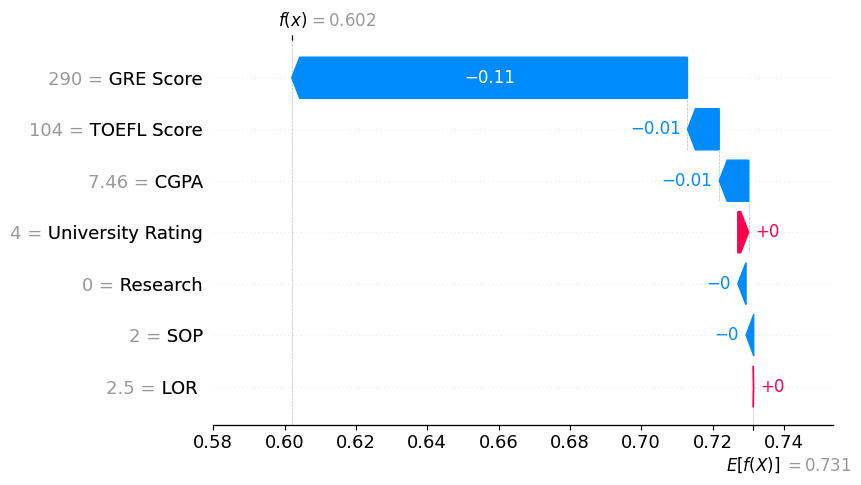

In [ ]:
explainer = shap.KernelExplainer(model_knn.predict, shap.kmeans(X_train, 10))
test_instance = x_test.iloc[45, :]
shap_values = explainer.shap_values(test_instance)
print(f"Shap Values Shape: {shap_values.shape}")

shap.waterfall_plot(
    shap.Explanation(
        values = shap_values,
        base_values = explainer.expected_value,
        data = test_instance,
        feature_names = X_train.columns
    )
)

Shap Values Shape: (7,)


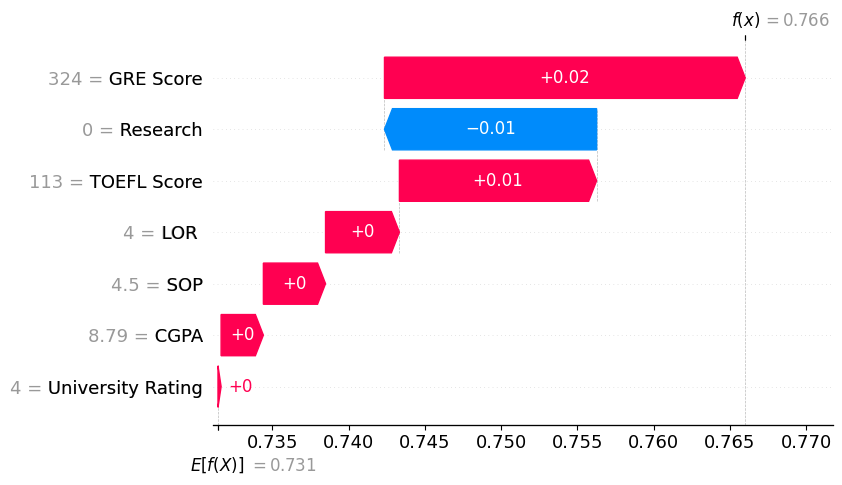

In [ ]:
explainer = shap.KernelExplainer(model_knn.predict, shap.kmeans(X_train, 10))
test_instance = x_test.iloc[48, :]
shap_values = explainer.shap_values(test_instance)
print(f"Shap Values Shape: {shap_values.shape}")

shap.waterfall_plot(
    shap.Explanation(
        values = shap_values,
        base_values = explainer.expected_value,
        data = test_instance,
        feature_names = X_train.columns
    )
)

# 3. LIME in Explainable AI (XAI)

LIME (Local Interpretable Model-Agnostic Explanations) is an Explainable AI (XAI) technique designed to provide human-understandable explanations for individual predictions made by any machine learning model. It creates a simpler, interpretable model to approximate the behavior of the complex model in the vicinity of a specific instance.

---

## Key Concepts of LIME

1. **Local Interpretability**:
   - LIME focuses on explaining a specific prediction by approximating the model behavior near the instance of interest.

2. **Model-Agnostic**:
   - LIME can explain any machine learning model, regardless of whether it is a black-box or white-box model.

3. **Surrogate Models**:
   - LIME builds a simpler, interpretable model (like a linear regression or decision tree) to mimic the behavior of the complex model around the specific instance.

4. **Perturbation-Based Approach**:
   - LIME perturbs the input data around the instance of interest and observes the changes in the model's predictions to understand feature importance.

---

## Why Use LIME?

1. **Explanations for Individual Predictions**:
   - LIME focuses on explaining specific predictions rather than providing a global explanation for the entire model.

2. **Interpretability**:
   - The surrogate models used by LIME (e.g., linear regression) are inherently interpretable and provide intuitive insights.

3. **Flexibility**:
   - LIME works across various data types, including text, tabular, and image data.

4. **Model Debugging**:
   - Identifies which features contribute most to a given prediction, helping debug model behavior.

---

## How LIME Works

1. **Perturbing the Data**:
   - LIME generates synthetic data by perturbing the features of the instance being explained. For tabular data, it modifies feature values randomly. For text, it may remove or mask words. For images, it alters pixels or segments.

2. **Generating Predictions**:
   - The perturbed data is passed through the original model to obtain predictions.

3. **Weighting Perturbed Samples**:
   - LIME assigns higher weights to perturbed samples that are closer to the original instance to focus on the local behavior of the model.

4. **Fitting a Surrogate Model**:
   - LIME uses the weighted perturbed data to train a simpler, interpretable model (e.g., linear regression or decision tree) that approximates the behavior of the original model locally.

5. **Feature Importance**:
   - The coefficients or feature contributions in the surrogate model explain the prediction of the original model for the instance.

---

## Visualizations in LIME

1. **Tabular Data**:
   - LIME highlights the contribution of each feature to a specific prediction, often displayed in a bar chart where positive contributions push the prediction higher and negative contributions pull it lower.

2. **Text Data**:
   - LIME identifies which words or phrases contributed most to the prediction, often visualized with color-coded text.

3. **Image Data**:
   - LIME identifies important regions in an image by perturbing pixels or segments, visualizing key regions that influenced the prediction.

---

## Applications of LIME

1. **Debugging Models**:
   - LIME helps identify which features drive unexpected predictions, enabling model debugging.

2. **Improving Trust**:
   - By explaining individual predictions, LIME builds trust in the model among stakeholders.

3. **Decision Support**:
   - Provides insights into specific predictions for use cases such as loan approval or medical diagnoses.

4. **Feature Engineering**:
   - Identifies irrelevant or redundant features for model optimization.



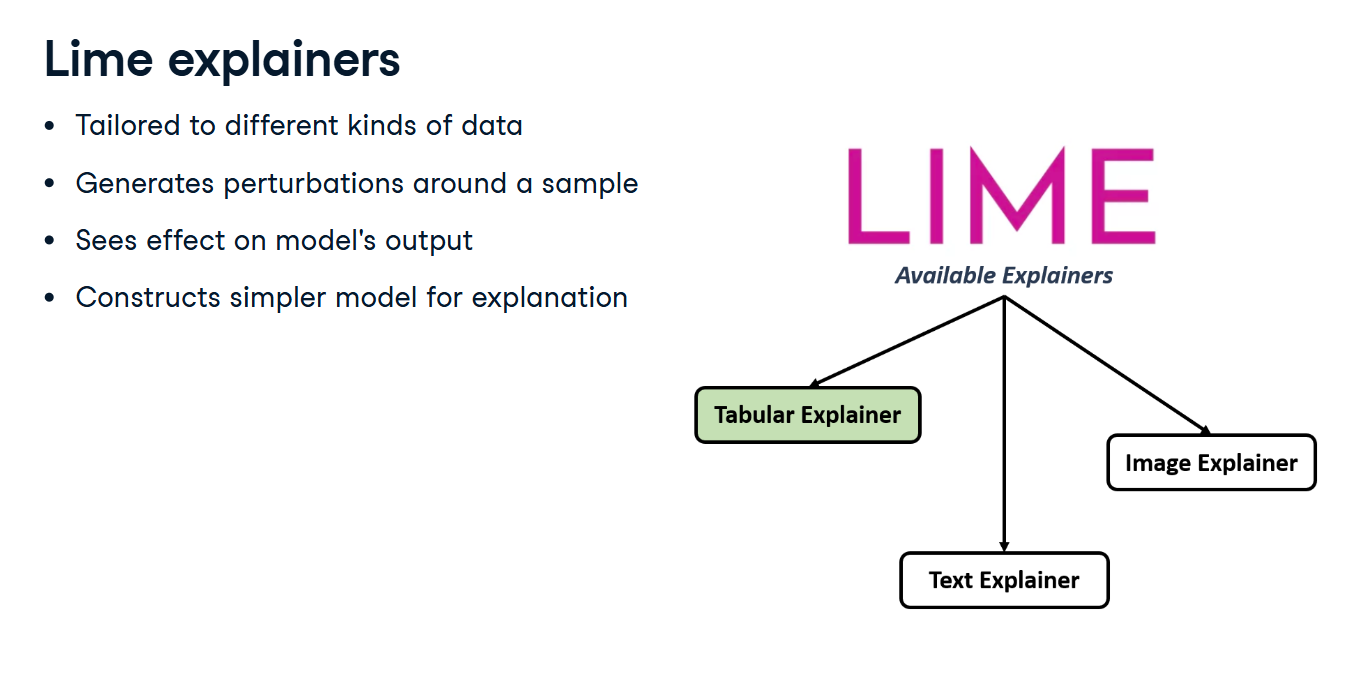

In [ ]:
!pip install lime -q

## 3.1 LimeTabularExplainer

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv("Admission_Predict.csv").drop('Serial No.', axis=1)
data

X_train, x_test, y_train_reg, y_test_reg = train_test_split(data.drop(["Chance of Admit "], axis=1),
                                                    data['Chance of Admit '],
                                                    test_size=0.25,
                                                    random_state=20)

def reg_to_clf(col):
  new = [ 1 if val>0.6 else 0 for val in col ]
  return new

y_train_clf, y_test_clf = reg_to_clf(y_train_reg), reg_to_clf(y_test_reg)


test_instance = x_test.iloc[22, :]

In [ ]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
model_knn = KNeighborsRegressor()
model_knn.fit(X_train, y_train_reg)

model_knn_clf = KNeighborsClassifier()
model_knn_clf.fit(X_train, y_train_clf)

KNeighborsClassifier()

In [ ]:
explaner_reg = LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    mode='regression'
)

explaner_reg = explaner_reg.explain_instance(
    test_instance.values,
    model_knn.predict
)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


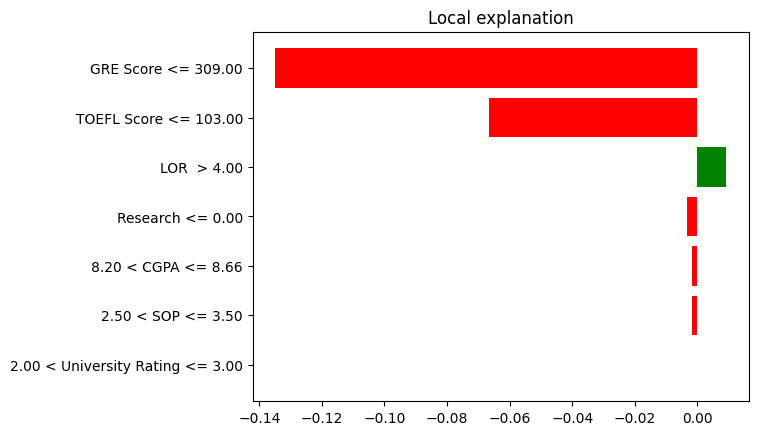

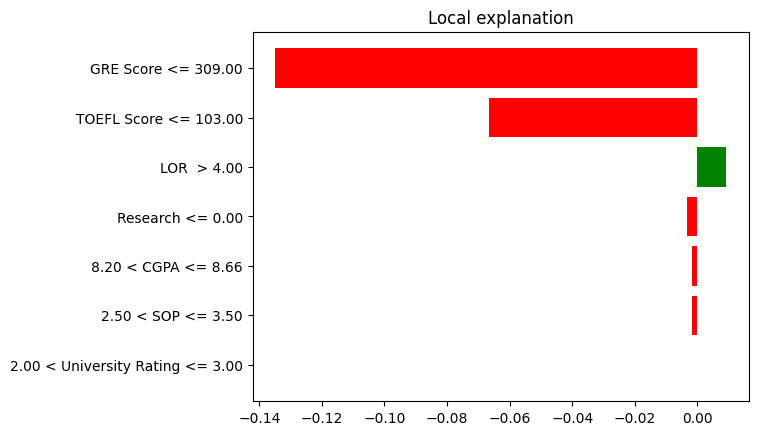

In [ ]:
explaner_reg.as_pyplot_figure()

In [ ]:
explaner_clf = LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    mode='regression'
)

explaner_clf = explaner_clf.explain_instance(
    test_instance.values,
    model_knn_clf.predict_proba
)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


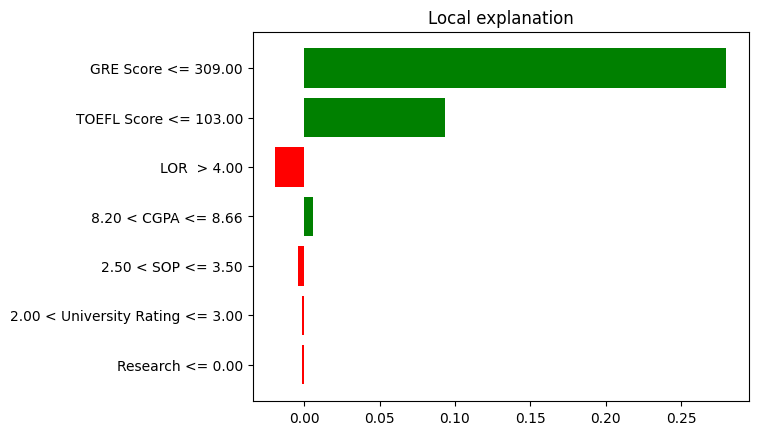

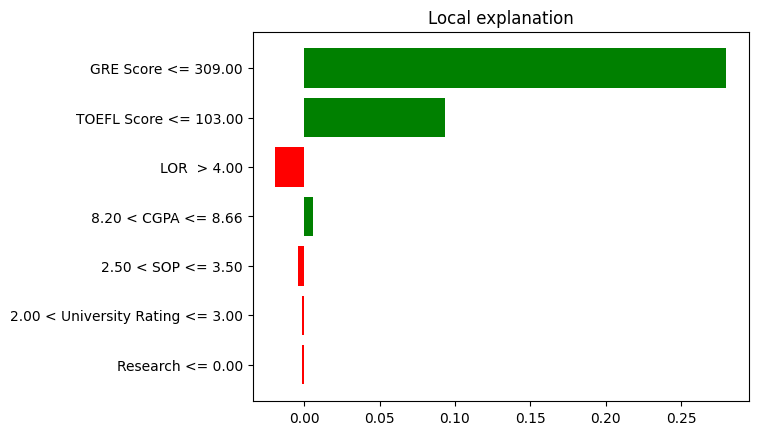

In [ ]:
explaner_clf.as_pyplot_figure()

#### Constrasting with SHAP, LIME's Local explanation shows the specific condition and ranges that details how features influance an individual prediction

## 3.1 LIME Text Explainer

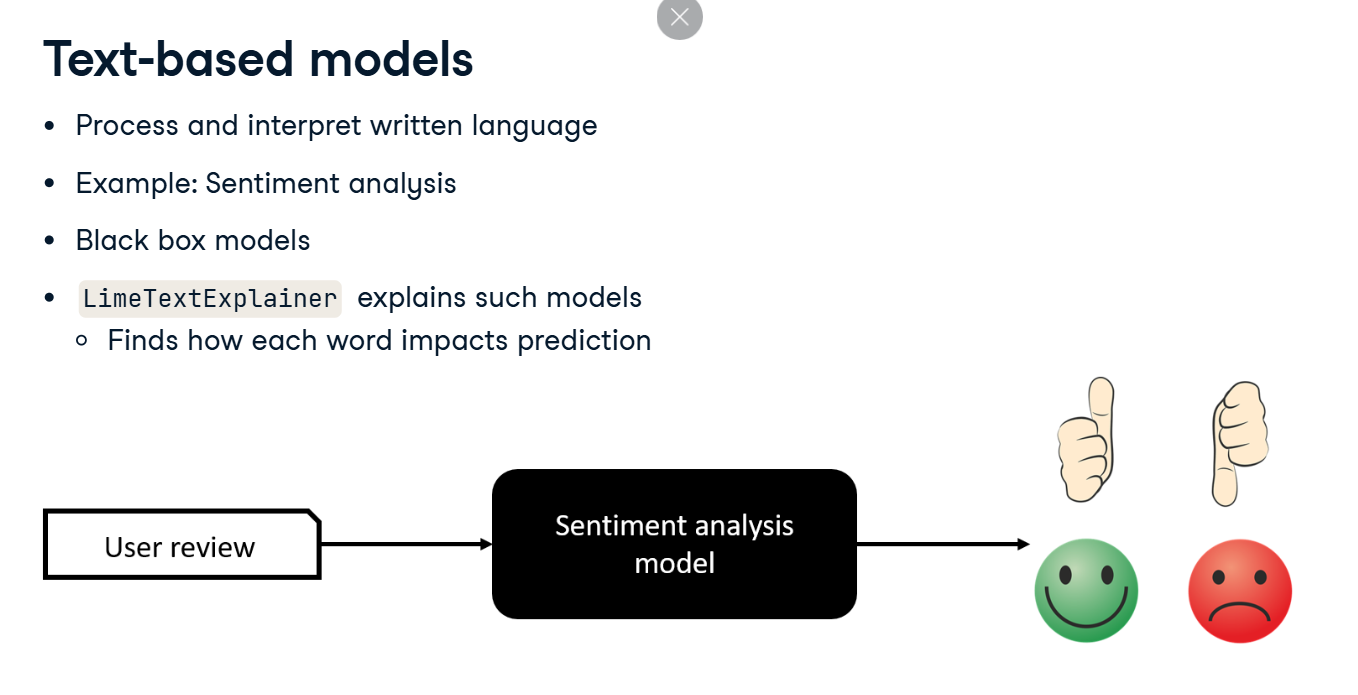

In [ ]:
from lime.lime_text import LimeTextExplainer

In [ ]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Load a smaller subset of the 20 Newsgroups dataset (using just 4 categories)
categories = ['rec.autos', 'sci.space']
newsgroups = fetch_20newsgroups(subset='all', categories=categories)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.3, random_state=42)
y_train = ['rec.autos' if val==0 else 'sci.space' for val in y_train]

# Convert the text data to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize the Naive Bayes classifier and train the model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)


MultinomialNB()

In [ ]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(vectorizer, nb_classifier)


In [ ]:
pipe.predict_proba([X_train[10]])

array([[0.84815382, 0.15184618]])

In [ ]:
newsgroups.target_names

['rec.autos', 'sci.space']

In [ ]:
pipe.classes_

array(['rec.autos', 'sci.space'], dtype='<U9')

In [ ]:
explainer = LimeTextExplainer(class_names=pipe.classes_, bow=False)
exp = explainer.explain_instance(
      X_train[10],
      pipe.predict_proba,
      num_features=20
)

In [ ]:
from IPython.core.display import display, HTML

display(HTML(exp.as_html()))


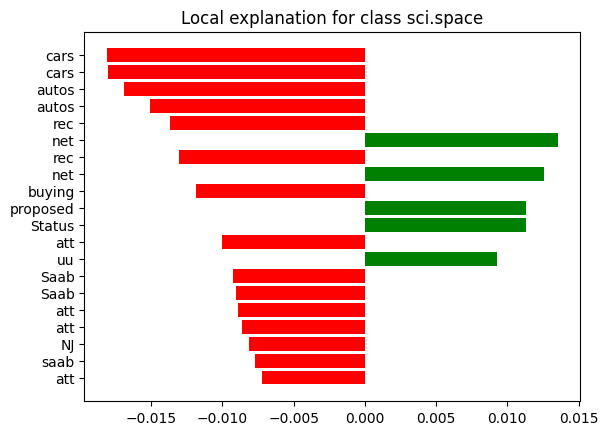

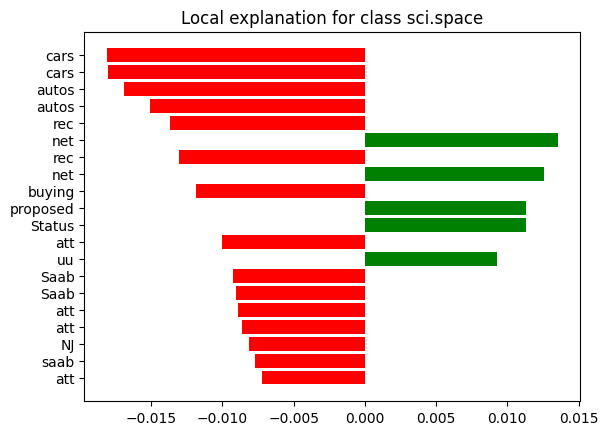

In [ ]:
text_instance = X_train[10]
predicted_class = pipe.predict([text_instance])[0]
exp.as_pyplot_figure()


-> Here Green bar represents sci.space and red bar represents rec.autos

## 3.3 LimeImageExplainer

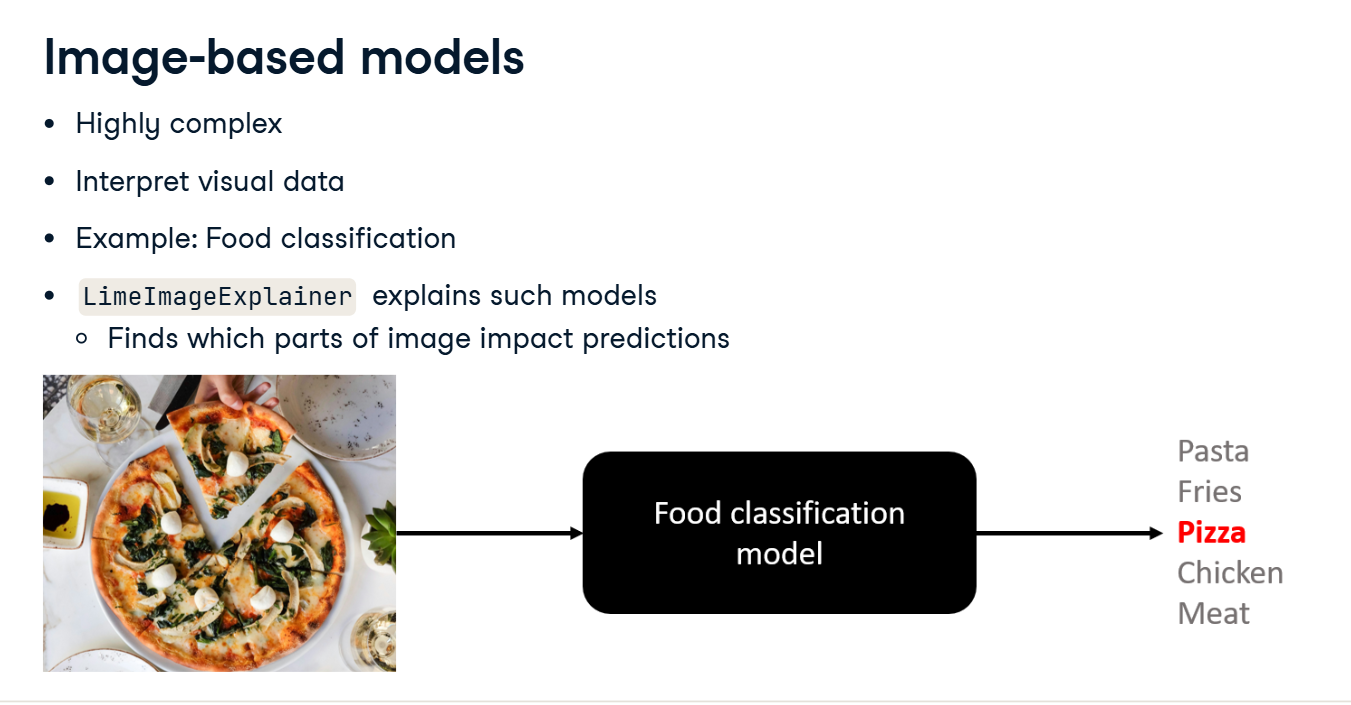

625/625 ━━━━━━━━━━━━━━━━━━━━ 167s 264ms/step - accuracy: 0.7743 - loss: 0.4638 - val_accuracy: 0.8440 - val_loss: 0.3328
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - accuracy: 0.8395 - loss: 0.3387
Test accuracy: 0.843999981880188


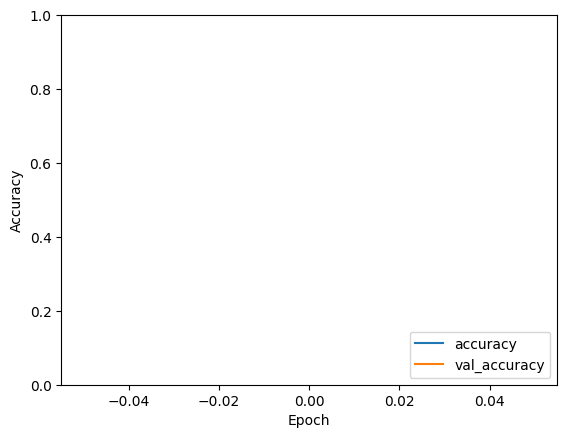

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 1. Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Flatten y_train and y_test to 1D arrays
y_train = y_train.flatten()
y_test = y_test.flatten()

# 2. Preprocess the data (filter for binary classification - "airplane" and "automobile")
X_train = X_train[(y_train == 0) | (y_train == 1)]  # "airplane" and "automobile" classes (0 and 1)
y_train = y_train[(y_train == 0) | (y_train == 1)]

X_test = X_test[(y_test == 0) | (y_test == 1)]
y_test = y_test[(y_test == 0) | (y_test == 1)]

# 3. Resize the images to 100x100
def resize_images(images, size=(100, 100)):
    resized_images = []
    for img in images:
        img_pil = Image.fromarray(img)
        img_resized = img_pil.resize(size)
        resized_images.append(np.array(img_resized))
    return np.array(resized_images)

X_train = resize_images(X_train)
X_test = resize_images(X_test)

# Normalize the images to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 4. Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# 5. Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 6. Train the model with batch size 16
history = model.fit(X_train, y_train, epochs=1, batch_size=16, validation_data=(X_test, y_test))

# 7. Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

# Optionally, visualize the training process
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Airplane


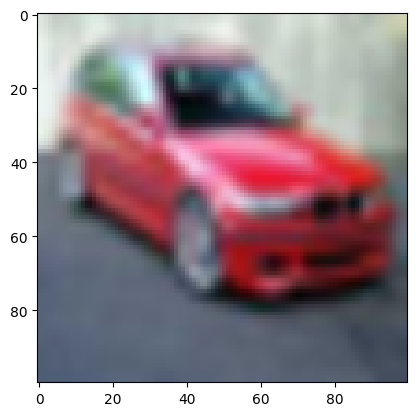

In [ ]:
sample = X_train[262]
prediction = model.predict(np.expand_dims(sample, axis=0))
print('Airplane' if prediction > 0.5 else 'Automobile')
plt.imshow(sample)

In [ ]:
from lime.lime_image import LimeImageExplainer

explainer = LimeImageExplainer()

explaination = explainer.explain_instance(
    sample,
    model.predict,
    num_samples = 500
)

temp, _ = explaination.get_image_and_mask(
    explaination.top_labels[0],
    hide_rest=True
)


  0%|          | 0/500 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━

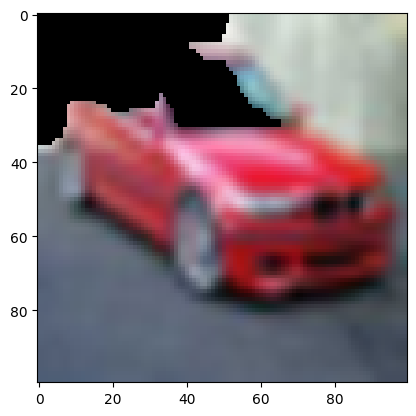

In [ ]:
plt.imshow(temp)

This sets the pixels, those are less important in black color